# 02 Pickle File Processing

This notebook demonstrates the typical pipeline of extracting data from the pickle files converted from NWB files in notebook 01.

It is assumed that you have already finished notebook 01 - if not please run all the cells in notebook 01.

### 1. Extracting Daily Data from Pickle Files

data_tools.py is provided for easier access to pkl files. We start by importing data_tools.

In [2]:
# Setting working directory to root to mimic usual usecase
###############################################################
import sys
import os
root_path = os.path.abspath(os.path.join(os.getcwd(), '../..'))
sys.path.insert(0, root_path)
###############################################################

from tutorial.utils import data_tools

data_tools.py contains two functions, extract_dates_from_filenames and load_day. Combining the two gives you daily data extracted from pkl files.

We first extract all the dates from the files.

In [3]:
data_path = '../../data_test'
dates = data_tools.extract_dates_from_filenames(data_path)

Then data from one day can be extracted as follows. data_CO is the data from centre-out trials and data_RD is the data from random trials. Some days contain both trials, some other days contain one of the trials.

In [4]:
data_CO, data_RD = data_tools.load_day(dates[0], data_path)
print(f"Data Exist in CO: {True if data_CO is not None else False} RD: {True if data_RD is not None else False}")

Data Exist in CO: True RD: False


This cell shows you what type of data is contained.

In [5]:
print(data_CO.keys())

dict_keys(['trial_number', 'trial_count', 'target_positions', 'trial_timeout', 'time', 'finger_kinematics', 'sbp', 'tcfr', 'trial_index', 'target_style', 'run_id'])


### 2. Typical Pipeline for Doing Things to Data [TODO: change this name]

The following code demonstrates with a simple example on how data can be done with things. [TODO: change what im saying]

In [6]:
import numpy as np
import pandas as pd

# Arbitrary variable to be accumulated
df_target_pos = pd.DataFrame({
    'date': dates,
    'target_positions_co': [None] * len(dates),
    'target_positions_rd': [None] * len(dates)
})

# Main loop for the pipeline
for date in dates:
    data_CO, data_RD = data_tools.load_day(date, data_path)
    if data_CO and data_RD:
        rd_pos = data_RD['target_positions']
        co_pos = data_CO['target_positions']
    elif data_RD:
        rd_pos = data_RD['target_positions']
        co_pos = None
    else:
        rd_pos = None
        co_pos = data_CO['target_positions']
    
    # Replace the following code with your logic to populate your accumulation variable
    df_target_pos.at[df_target_pos.index[df_target_pos['date'] == date][0], 'target_positions_co'] = co_pos
    df_target_pos.at[df_target_pos.index[df_target_pos['date'] == date][0], 'target_positions_rd'] = rd_pos

C:\Users\chang\AppData\Local\Temp\ipykernel_20328\1194726629.py:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


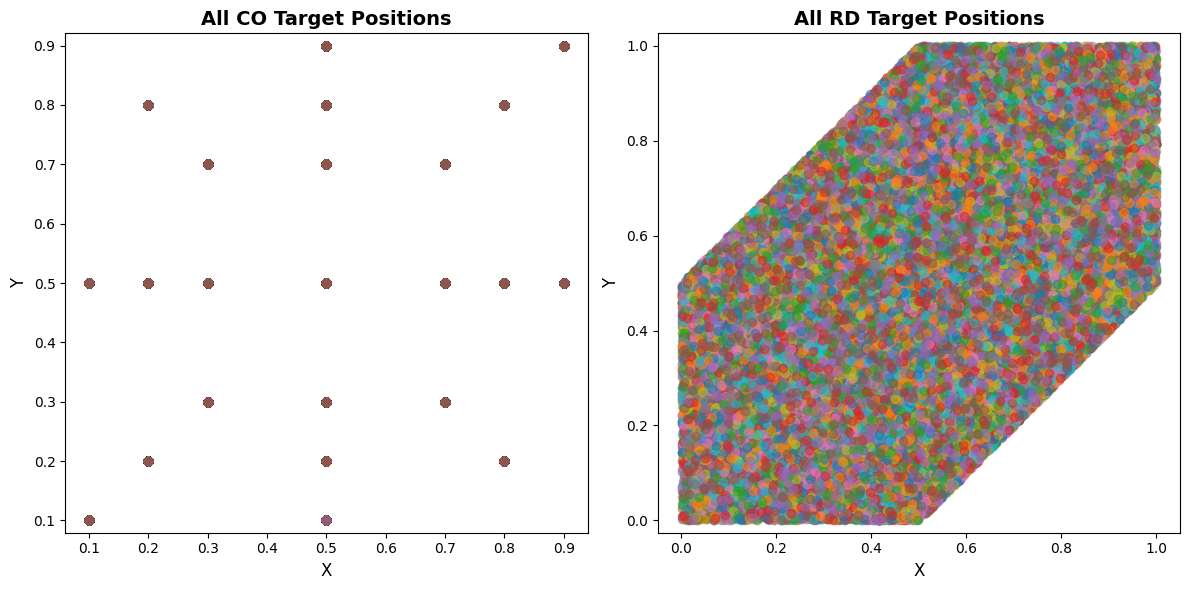

In [7]:
import matplotlib.pyplot as plt
from tutorial.config import mpl_config
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Left: CO
for pos in df_target_pos['target_positions_co']:
    if pos is not None:
        axes[0].scatter(pos[:, 0], pos[:, 1], alpha=0.5)
axes[0].set_title('All CO Target Positions')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
axes[0].axis('equal')

# Right: RD
for pos in df_target_pos['target_positions_rd']:
    if pos is not None:
        axes[1].scatter(pos[:, 0], pos[:, 1], alpha=0.5)
axes[1].set_title('All RD Target Positions')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')
axes[1].axis('equal')

plt.tight_layout()
plt.show()